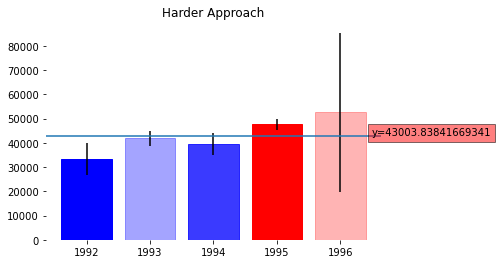

[1.0, 0.3577343041633575, 0.7708846729645454, 1.0, 0.29275341402421795]


In [10]:
#Easy approach

#Difficult Approach

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650),
                  np.random.normal(57000,1000000,3650)],
                  index=[1992,1993,1994,1995,1996])

def plotmean(dataframe, hValue):
    
    barHights = dataframe.T.mean()
    barErrors = dataframe.T.sem()*1.96
    
    y = list(barHights)
    x = list(dataframe.T.columns)
    z = list(barErrors)
    
    colors = []
    alphas = [] 
    
    for value in y:
        if value < hValue:
            colors.append('b')
        elif value > hValue:
            colors.append('r')
        else:
            colors.append('g')
    
    for i in range(len(y)):
        if y[i] < hValue:
            alphas.append(1-max(0,(y[i]+z[i]-hValue))/z[i])
        if y[i] > hValue:
            alphas.append(1-max(0,(hValue-y[i]+z[i]))/z[i])    
    
    fig = plt.figure()
    #plt.axis('off')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    ax1 = plt.bar(x,y, yerr = barErrors, color = 'grey')
    for i in range(len(ax1.get_children())):
        ax1.get_children()[i].set_color(colors[i])
        ax1.get_children()[i].set_alpha(alphas[i])
    plt.xticks(x)
    plt.axhline(y=hValue)
    plt.title('Harder Approach')
    plt.text(1996.5,hValue+10,'y='+str(hValue),bbox=dict(facecolor='red', alpha=0.5))
    plt.show()
    print(alphas)
    
plotmean(df, df.T.mean().mean())

